In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import copy

In [2]:
tf.config.experimental_run_functions_eagerly(True)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
df = pd.read_csv("sudoku.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'sudoku.csv'

In [6]:
df.head()

,quizzes,solutions
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...


In [7]:
number_of_samples = 1000000
unsolved = df['quizzes']#.iloc[:number_of_samples].values
solved = df['solutions']#.iloc[:number_of_samples].values

In [8]:
X = []
y = []

In [9]:
for sudoku in unsolved:
    np_solved = np.array([int(x) for x in sudoku]).reshape(9,9,1)
    X.append(np_solved)
    
for sudoku in solved:
    np_unsolved = np.array([int(y) for y in sudoku]).reshape(81,1) - 1
    y.append(np_unsolved)

In [10]:
np_X = np.array(X)
np_X = np_X/9
np_X -= 0.5
np_y = np.array(y)

In [11]:
#del(X)
#del(y)
#del(solved)
#del(unsolved)

In [12]:
np_y.shape

(1000000, 81, 1)

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [14]:
X_train, X_test, y_train, y_test = train_test_split(np_X, np_y, test_size=0.2)

In [15]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Reshape, BatchNormalization, Activation, Input,Dropout
from tensorflow.keras.optimizers import Adam

In [16]:
input_shape = (9,9,1)
batch_size = 128

In [82]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(1,1), activation='relu', padding='same'))

model.add(Flatten())
model.add(Dense(81*9))
model.add(Reshape((-1, 9)))
model.add(Activation('softmax'))

adam = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 9, 64)          640       
_________________________________________________________________
batch_normalization (BatchNo (None, 9, 9, 64)          256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 9, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         8320      
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0         
_________________________________________________________________
dense (Dense)                (None, 729)               7

In [87]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import set_value

In [88]:
early_stop = EarlyStopping(monitor='val_loss',patience=2, restore_best_weights=True)

In [89]:
with tf.device('/GPU:0'):
    model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data = [X_test, y_test], callbacks = [early_stop])

Train on 800000 samples, validate on 200000 samples
Epoch 1/5
800000/800000 [==============================] - 220s 276us/sample - loss: 0.5127 - accuracy: 0.7766 - val_loss: 0.3779 - val_accuracy: 0.8195
Epoch 2/5
800000/800000 [==============================] - 226s 282us/sample - loss: 0.3657 - accuracy: 0.8253 - val_loss: 0.3620 - val_accuracy: 0.8269
Epoch 3/5
800000/800000 [==============================] - 235s 293us/sample - loss: 0.3501 - accuracy: 0.8348 - val_loss: 0.3573 - val_accuracy: 0.8298
Epoch 4/5
800000/800000 [==============================] - 260s 325us/sample - loss: 0.3380 - accuracy: 0.8427 - val_loss: 0.3581 - val_accuracy: 0.8298
Epoch 5/5
800000/800000 [==============================] - 275s 344us/sample - loss: 0.3296 - accuracy: 0.8480 - val_loss: 0.3584 - val_accuracy: 0.8301


In [39]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

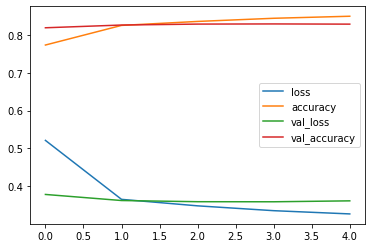

In [40]:
losses.plot()

In [13]:
from tensorflow.keras.models import load_model

In [92]:
#tf.keras.models.save_model(model, "saved_model.hp5", save_format="h5")

TypeError: save_model() got an unexpected keyword argument 'compile'

In [19]:
model =  tf.keras.models.load_model("saved_model.hp5", compile=False)

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 9, 9, 64)          640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 9, 9, 64)          256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 9, 9, 64)          256       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 128)         8320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 10368)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 729)              

In [21]:
def normalize(np_a):
    
    return (np_a/9)-0.5

In [22]:
def denormalize(np_a):
    
    return (np_a+0.5)*9

In [23]:
def solve_batch(np_boards, np_solved_boards, model):
    np_results = np.empty(np_boards.shape[0],dtype=np.bool_)
    for i in np.ndindex(np_boards.shape[:1]):
        solved = solve_human_approach(np_boards[i], model)
        np_results[i] = compare_sudoku(solved, (np_solved_boards[i]+1).reshape(9,9))
        print(f"Solved sudoku number: {i}")
    correct_boards = np_results.sum()
    acc = correct_boards/np_boards.shape[0]
    return correct_boards

In [24]:
def solve_human_approach (np_sample_board, model): 
    
    #np_board = np.copy(np_sample_board)
    np_board = np.copy(np_sample_board)
    #get number of blank in sudoku board
    #blanks_count = 81 - np.count_nonzero(np_board)
    
    #for _ in range(blanks_count):
    while(1):
        np_board_4d = np_board.reshape((1,9,9,1))
        predictions = model.predict(np_board_4d)[0]
        predictions_int = np.argmax(predictions, axis=1).reshape((9,9))+1           #change range of digits from <0,8> to <1,9>
        propabilities = np.around(np.max(predictions, axis=1).reshape((9,9)), 2) 
                        
        #get position with the highest propability
        np_board = denormalize(np_board).reshape((9,9))
        zeros = (np_board == 0)
        if (zeros.sum() == 0):
            break
        blanks_indices = np.where(zeros)
        blanks_indices = np.array([(i,j) for i,j in zip(blanks_indices[0], blanks_indices[1])])
        position_to_fill = blanks_indices[propabilities[zeros].argmax()]
        #fill position with the highest propability
        value_to_fill = predictions_int[position_to_fill[0], position_to_fill[1]]
        
        np_board[position_to_fill[0], position_to_fill[1]] = value_to_fill
        np_board = normalize(np_board)
    return np_board

In [25]:
def compare_sudoku (np_sudoku1, np_sudoku2):
    #True/False array
    comparision = np_sudoku1 == np_sudoku2
    #print(np.count_nonzero(comparision))
    return comparision.all()

In [26]:
x = solve_batch(X_test[:10], y_test[:10], model)
x

Solved sudoku number: (0,)
Solved sudoku number: (1,)
Solved sudoku number: (2,)
Solved sudoku number: (3,)
Solved sudoku number: (4,)
Solved sudoku number: (5,)
Solved sudoku number: (6,)
Solved sudoku number: (7,)
Solved sudoku number: (8,)
Solved sudoku number: (9,)


10

In [94]:
x = solve_human_approach(X_test[150], model)
x

array([[3., 2., 8., 7., 5., 1., 9., 6., 4.],
       [6., 4., 7., 8., 9., 2., 3., 5., 1.],
       [5., 9., 1., 3., 6., 4., 7., 8., 2.],
       [1., 3., 6., 2., 7., 8., 5., 4., 9.],
       [7., 5., 4., 6., 3., 9., 1., 2., 8.],
       [9., 8., 2., 1., 4., 5., 6., 7., 3.],
       [2., 6., 5., 4., 1., 3., 8., 9., 7.],
       [8., 1., 9., 5., 2., 7., 4., 3., 6.],
       [4., 7., 3., 9., 8., 6., 2., 1., 5.]])

In [30]:
compare_sudoku(x,(y_test[150]+1).reshape(9,9))

True